https://365datascience.com/tutorials/python-tutorials/how-to-build-a-customer-churn-prediction-model-in-python/

In [2]:
ls

 Volume in drive D is Data
 Volume Serial Number is 50A0-68A3

 Directory of d:\Rajendra-Tech\GitHubRepos\AI-ML

06/12/2023  06:59 am    <DIR>          .
06/12/2023  06:53 am    <DIR>          ..
06/12/2023  06:53 am                66 .gitattributes
06/12/2023  07:00 am    <DIR>          .venv
06/12/2023  07:01 am           831,835 Customer-Churn.ipynb
06/12/2023  06:53 am                46 README.md
               3 File(s)        831,947 bytes
               3 Dir(s)  572,686,077,952 bytes free


In [2]:
# Copies the file (or folder) from Notebook resources.
# You can copy the Lakehouse ABFS path from the contextual menu of any Lakehouse folder.
# mssparkutils.fs.cp(
# "file:///synfs/nb_resource/builtin/customer_churn.csv",
# "abfss://4bf65440-7c21-4429-bb45-d0e3b6b6e0be@onelake.dfs.fabric.microsoft.com/85bebcdc-42bf-4b16-a854-42bef3c72b2c/Files",       # Target Lakehouse ABFS path
# True        # Recursive?
# )


StatementMeta(, , , Waiting, )

In [3]:
# import pandas as pd
# # Load data into pandas DataFrame from f"{mssparkutils.nbResPath}/builtin/customer_churn.csv"
# df = pd.read_csv(f"{mssparkutils.nbResPath}/builtin/customer_churn.csv")
# #display(df)

StatementMeta(, , , Waiting, )

In [4]:
import pandas as pd
# Load data into pandas DataFrame from f"{mssparkutils.nbResPath}/builtin/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(f"{mssparkutils.nbResPath}/builtin/Customer-Churn.csv")
display(df)

StatementMeta(, , , Waiting, )

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, b6b071e5-a1ca-4b88-ad0d-a396486a1fa1)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


In [5]:
#df.head()

display(df.head())


StatementMeta(, , , Waiting, )

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, c586cd6c-1243-44a1-846d-27e86fcf57e2)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


In [6]:
# Display data types of each column
print(df.dtypes)

StatementMeta(, , , Waiting, )

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
df.columns

StatementMeta(, , , Waiting, )

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
from IPython.display import HTML

StatementMeta(, , , Waiting, )

In [9]:
def ToHtml(description) :
    # Convert the DataFrame to HTML representation
    html_output = description.to_html()

# Display the HTML output in Jupyter Notebook

    display(HTML(html_output))


StatementMeta(, , , Waiting, )

In [10]:
display(df.describe())

StatementMeta(, , , Waiting, )

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, d32daebe-e48c-429f-b15a-d43f17596185)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


In [11]:
# Generate descriptive statistics
description = df.describe()
ToHtml(description)

# # Convert the DataFrame to HTML representation
# html_output = description.to_html()

# # Display the HTML output in Jupyter Notebook

# display(HTML(html_output))

StatementMeta(, , , Waiting, )

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
# total columns
display(df.shape[0])

StatementMeta(, , , Waiting, )

7043

In [13]:
df.info()

StatementMeta(, , , Waiting, )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df["Churn"].value_counts()

StatementMeta(, , , Waiting, )

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

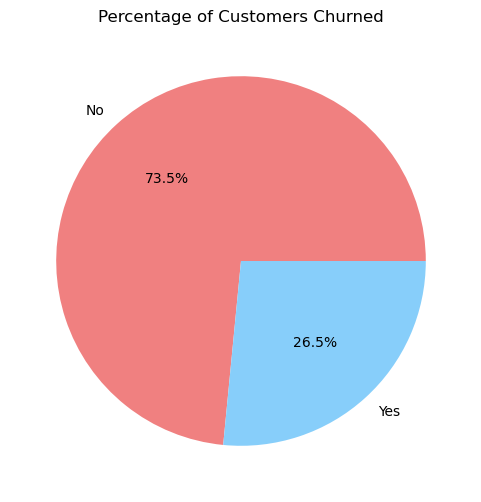

In [27]:
# Count the number of customers who churned and did not churn
churn_counts = df["Churn"].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title("Percentage of Customers Churned")
plt.show()

**Only around 27% of the customers in the dataset have churned. This means that we are dealing with an imbalanced classification problem. We will need to perform some feature engineering to create a balanced training dataset before building the predictive model.**

StatementMeta(, , , Waiting, )

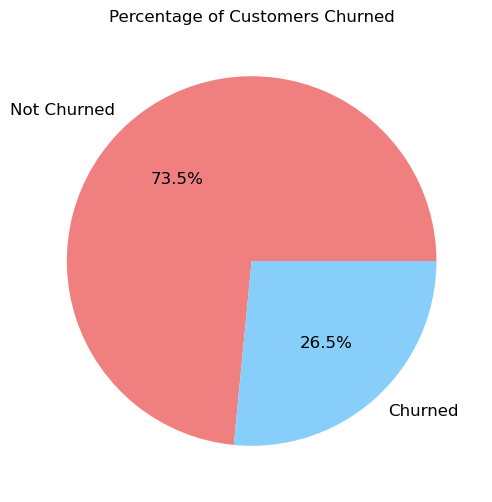

In [29]:
# Count the number of customers who churned and did not churn
churn_counts = df["Churn"].value_counts()

# Plotting a pie chart with custom labels
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], textprops={'fontsize': 12})
plt.title("Percentage of Customers Churned")
plt.show()

In [ ]:
df.head()

StatementMeta(, , , Waiting, )

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploratory Data Analysis for Customer Churn Prediction**
Now, let’s perform some exploratory data analysis to gain a better understanding of the independent variables in the dataset and their relationship with customer churn. 

We will start by analyzing the demographic data points:

StatementMeta(, , , Waiting, )

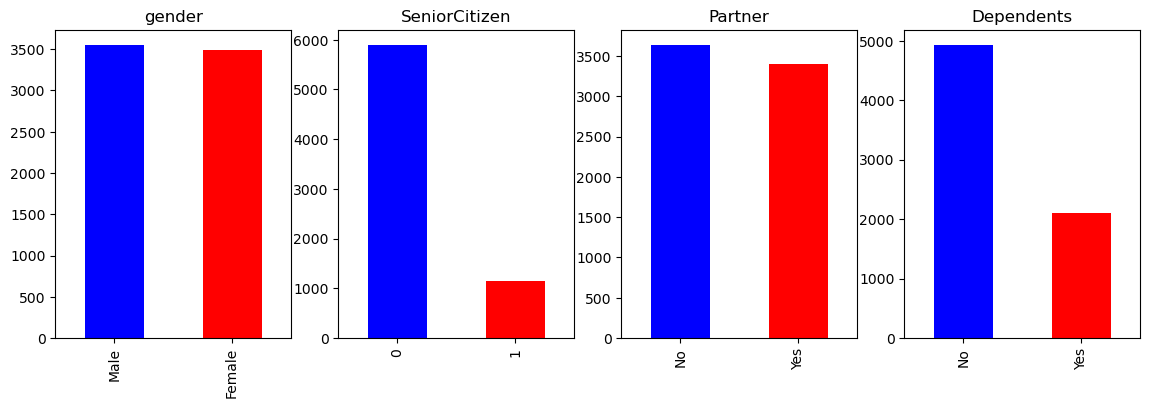

In [26]:


cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
numerical = cols

plt.figure(figsize=(14, 4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i + 1)
    df[str(col)].value_counts().plot(kind='bar', color=['blue', 'red'])
    ax.set_title(f"{col}")

plt.show()



Most customers in the dataset are  individuals without a dependent. There is an equal distribution of user gender and marital status.

Now, let’s look into the relationship between cost and customer churn. In the real world, users tend to unsubscribe to their mobile service provider and switch to a different brand if they find the monthly subscription cost too high. Let’s check if that behavior is reflected in our dataset:

In [31]:
import seaborn as sns

StatementMeta(, , , Waiting, )

The assumption above is true. Customers who churned have a higher median monthly charge than customers who renewed their subscription.

StatementMeta(, , , Waiting, )

<AxesSubplot: xlabel='Churn', ylabel='MonthlyCharges'>

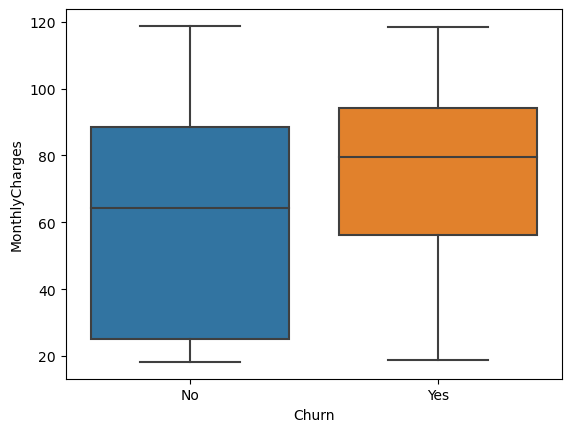

In [32]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

The assumption above is true. Customers who churned have a higher median monthly charge than customers who renewed their subscription.

Finally, let’s analyze the relationship between customer churn and a few other categorical variables captured in the dataset:

Let’s look into each attribute:

InternetService: It is clear from the visual above that customers who use fiber optic Internet churn more often than other users. This might be because fiber Internet is a more expensive service, or this provider doesn’t have good coverage.

TechSupport: Many users who churned did not sign up for tech support. This might mean that these customers did not receive any guidance on fixing technical issues and decided to stop using the service. 

OnlineBackup: Many customers who had churned did not sign up for an online backup service for data storage. 

Contract: Users who churned were almost always on a monthly contract. This makes sense, since these customers pay for the service on a monthly basis and can easily cancel their subscription before the next payment cycle.


StatementMeta(, , , Waiting, )

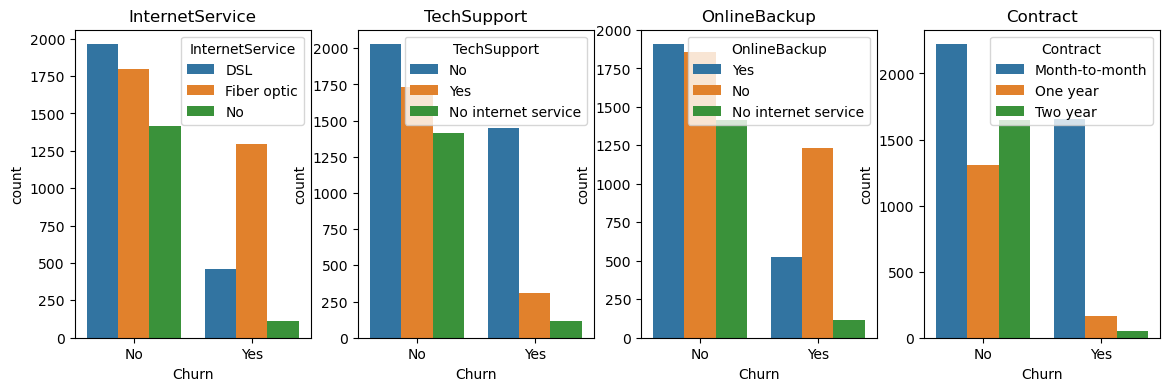

In [33]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

Even without building a fancy machine learning model, a simple data-driven analysis like this can help organizations understand why they are losing customers and what they can do about it. 

**Step 4: Preprocessing Data for Customer Churn**

In [ ]:
df.info()

StatementMeta(, , , Waiting, )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Notice that the variable “TotalCharges” has the data type “object,” when it should be a numeric column. Let’s convert this column into a numeric one:

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

StatementMeta(, , , Waiting, )

In [ ]:
df.info()

StatementMeta(, , , Waiting, )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Encoding Categorical Variables

In [ ]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

StatementMeta(, , , Waiting, )

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


Now, let’s take a look at the dataset after encoding these categorical variables:

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

StatementMeta(, , , Waiting, )

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


Finally, run the following lines of code to merge the dataframe we just created with the previous one:

In [ ]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

StatementMeta(, , , Waiting, )

There are a variety of techniques that can be used to overcome the class imbalance problem in machine learning. In this tutorial, we will use a technique called oversampling. 

Oversampling

In [ ]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

StatementMeta(, , , Waiting, )

Now, let’s oversample the training dataset:

In [ ]:
#pip install imblearn

StatementMeta(, , , Waiting, )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 26.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 26.5 MB/s eta 0:00:00


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

StatementMeta(, , , Waiting, )

Let’s check the number of samples in each class to ensure that they are equal:

There should be 3,452 values in each class, which means that the training dataset is now balanced.


In [ ]:
y_train.value_counts()

StatementMeta(, , , Waiting, )

0    3452
1    3452
Name: Churn, dtype: int64

**Step 5: Building the Customer Churn Prediction Model**

We will now build a random forest classifier to predict customer churn:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

StatementMeta(, , , Waiting, )

RandomForestClassifier(random_state=46)

**Step 6: Customer Churn Prediction Model Evaluation**

Let’s evaluate the model predictions on the test dataset:

In [ ]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

StatementMeta(, , , Waiting, )

0.7673416630762603


0.7673416630762603


Our model is performing well, with an accuracy of approximately 0.78 on the test dataset.